# Text Mining - Stock Sentiment 2023
#### Luís Ribeiro (nº 20231536)
#### Fernando Tiago (nº 20231535)

## Data Exploration
### Here  you  should  analyze  the  corpora  and  providesome  conclusions and visual information (bar charts, word clouds, etc.) that contextualize the data.

We start by importing the data and the necessary libraries for this project. Namely: pandas; numpy; and sklearn.

In [1]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install wordcloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
train_data

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2


We'll start off by plotting some bar charts and word clouds that help us understand words that are going to be more frequent in the data.

In [3]:
train_data['word_count'] = train_data['text'].apply(lambda text: len(text.split(" ")))
train_data

,text,label,word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10
1,$CCL $RCL - Nomura points to bookings weakness...,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16
9539,Tupperware Brands among consumer gainers; Unil...,2,9
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9


For visualizing the most frequent words we'll use a word cloud, using the wordcloud library for visualization.

In [4]:
from wordcloud import WordCloud

def plot_word_cloud(texts):
    text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 6));
    plt.imshow(wordcloud, interpolation='bilinear');
    plt.axis('off');
    plt.show();

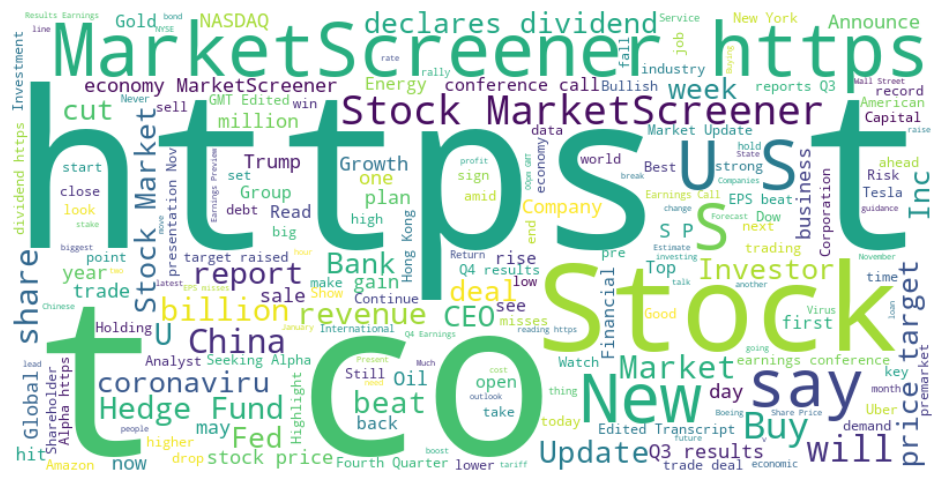

In [5]:
plot_word_cloud(train_data['text'])

As we can see, the data has not been cleaned up yet. So a lot of frequent words include "https", "http" and other words without a meaning for this context. So a future step *must* be to clean them up from the training data.

In [6]:
def plot_word_bar(texts):
    words = ' '.join(texts).split()
    freq = pd.Series(words).value_counts()
    x_labels = freq.index[0:10]
    values = freq[:10]
    plt.bar(x_labels, values, align='center', alpha=0.5)
    plt.xticks(x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

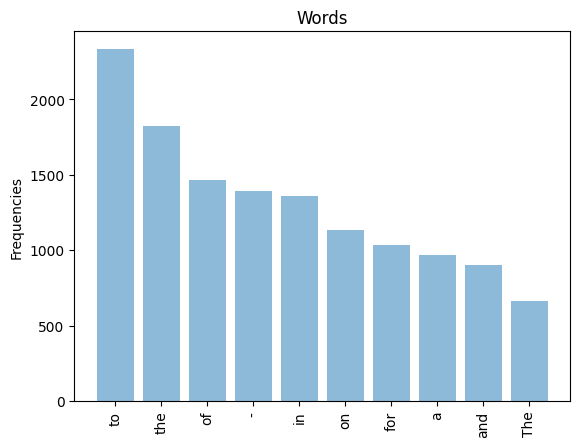

In [7]:
plot_word_bar(train_data['text'])

Analyzing the most frequent words through a bar plot, we can easily observe that the most frequent words are all stop words.

In [8]:
print(
    "Bearish word count analysis:\n", 
    train_data[ train_data.label == 0 ].word_count.describe()
)

print(
    "Bullish word count analysis:\n", 
    train_data[ train_data.label == 1 ].word_count.describe()
)

print(
    "Neutral word count analysis:\n", 
    train_data[ train_data.label == 2 ].word_count.describe()
)

Bearish word count analysis:
 count    1442.000000
mean       11.984050
std         4.276417
min         3.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: word_count, dtype: float64
Bullish word count analysis:
 count    1923.000000
mean       11.905876
std         4.295895
min         2.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        27.000000
Name: word_count, dtype: float64
Neutral word count analysis:
 count    6178.000000
mean       12.292651
std         4.833858
min         1.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        29.000000
Name: word_count, dtype: float64


A also possible analysis is through the labels, analysing the word count. We can see that on average, the sentiment does not impact the number of words written.

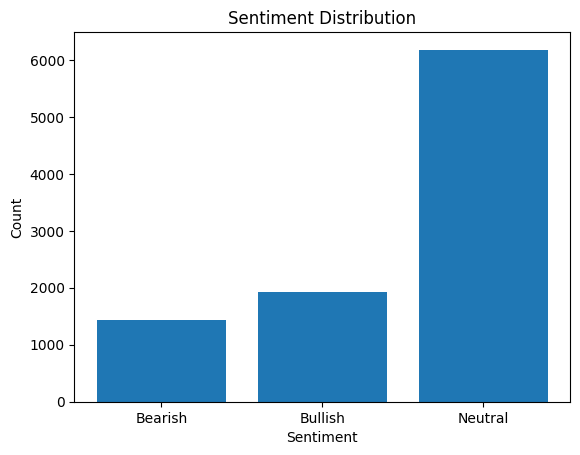

In [9]:
import matplotlib.pyplot as plt

labels = {0: "Bearish", 1: "Bullish", 2: "Neutral"}
label_counts = train_data['label'].value_counts().sort_index()

plt.bar(labels.values(), label_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


Analyzing the bar plot for the sentiment distribution within the training data, we can see that the majority of tweets were marked as "Neutral". This means that our model will better at predicting neutral tweets compared to other sentiments.

## Data Preprocessing
### You must correctly implement and experiment at least four(4) of the data preprocessing  techniques shownin  class(stop  words,  regular expressions,  lemmatization, stemming, etc.).

### Removing URLs (Regular expressions)

In the previous steps, we have noticed the url of links are very present in the data. However, they carry no meaning, and thus should be removed.

In [10]:
pd.set_option('display.max_colwidth', None)
train_data[ train_data['text'].str.contains('http') ]

,text,label,word_count
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10
...,...,...,...
9513,Luckin Coffee shares halted in premarket; news pending https://t.co/6Kz4NwnNFN,2,9
9529,"Stocks making the biggest moves midday: Amazon, IBM, Delta, Luckin & more https://t.co/ApOoJc0VDJ",2,13
9534,"Stocks making the biggest moves midday: Tesla, FedEx, Slack, Lyft, Taubman Centers & more https://t.co/ImutcATVER",2,15
9535,"Stocks making the biggest moves midday: Uber, Tesla, Ulta, Zoom Video & more https://t.co/XN1cJCUNxT",2,14


We can see that the urls tend to show up in the end of the text. A easy and elegant solution is replacing them with empty strings via regex.

In [11]:
import re #regex

def remove_url(text):
    return re.sub(r'https?://\S+', '', text).strip()

train_data['clean_text'] = train_data['text'].apply(remove_url)
train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,$BYND - JPMorgan reels in expectations on Beyond Meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook"
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,$ESS: BTIG Research cuts to Neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,$FNKO - Funko slides after Piper Jaffray PT cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,Tupperware Brands among consumer gainers; Unilever leads the losers
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,"WORK, XPO, PYX and AMKR among after hour movers"


An interesting use of regex that might also help our data is replacing stock tickers, which should carry no real meaning to sentiment prediction, with placeholder values. For example: $JPM would become #PLACEHOLDERSTOCK.

In [12]:
def generify_stock(text):
    return re \
        .sub(r'[$][A-Za-z][\S]*', "#PLACEHOLDERSTOCK", text) \
        .strip()

train_data['clean_text'] = train_data['clean_text'] \
    .apply(generify_stock)

train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,#PLACEHOLDERSTOCK - JPMorgan reels in expectations on Beyond Meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,#PLACEHOLDERSTOCK #PLACEHOLDERSTOCK - Nomura points to bookings weakness at Carnival and Royal Caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,"#PLACEHOLDERSTOCK - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook"
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,#PLACEHOLDERSTOCK BTIG Research cuts to Neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,#PLACEHOLDERSTOCK - Funko slides after Piper Jaffray PT cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,Tupperware Brands among consumer gainers; Unilever leads the losers
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,"WORK, XPO, PYX and AMKR among after hour movers"


After these changes, we now look at our data through a word cloud and bar plot:

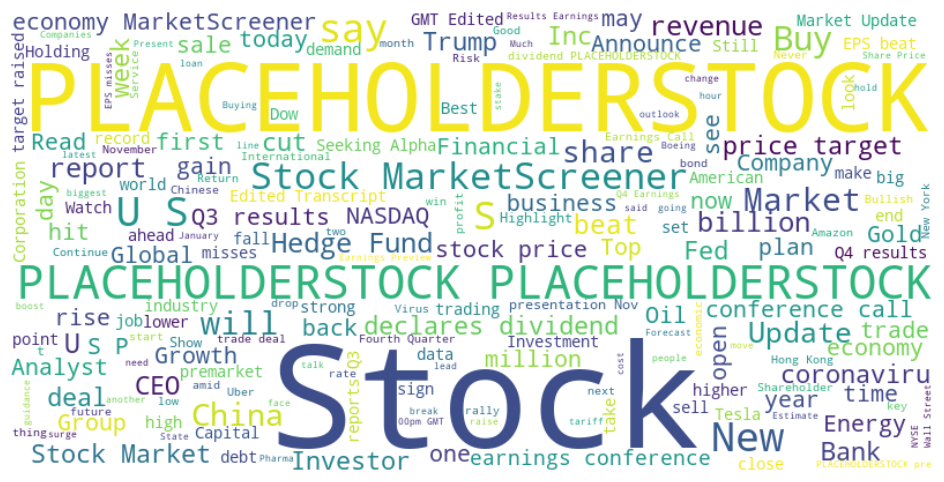

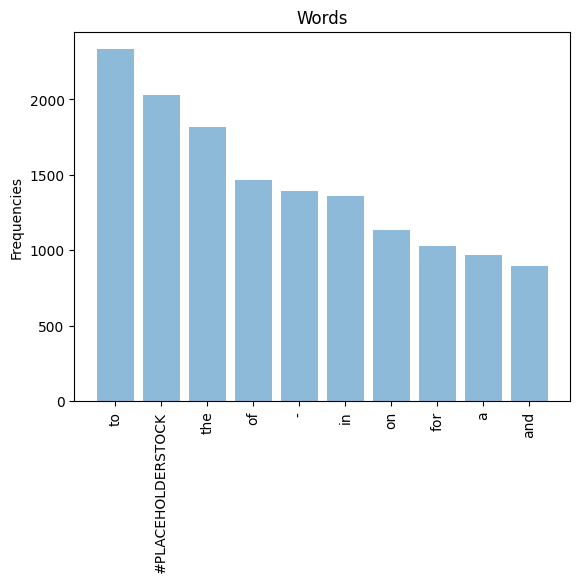

In [13]:
plot_word_cloud(train_data['clean_text'])
plot_word_bar(train_data['clean_text'])

Looking at the word cloud we can already see the impact that removing the URLs had on the data, but if we look at the bar plot of the word frequencies we can see that it's heavily dominated by stop words that don't add meaning to the data. Therefore, our next step is to deal with this issue. Another observation is since we generalized all stocks, our replace placeholder has gained dominance in the data.

### Removing stop words

Our next step is to remove the stop words. We'll also remove words that don't start with a letter (ponctuation, stock tickers, etc.). Also, we'll normalize all words by lowercasing them.

Stock tickers will be removed because even though they add context, they are really not relevant to determining the sentiment of a sentence.

In [14]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rluis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rluis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
stop_words = set(nltk.corpus.stopwords.words('english'))

def remove_useless_words(text):
    text = text.lower() #lower case the text

    #remove stock tickers
    text = re.sub(r'\$\w+', " ", text)

    #remove numerical data & punctuation
    text = re.sub("[^a-zA-Z]"," ", text )
    text = re.sub("br", "", text)

    #remove stop words
    text = " ".join([word for word in text.split() if word not in stop_words])

    #remove single characters
    text = " ".join([word for word in text.split() if len(word) > 1])

    return text

remove_useless_words(train_data['clean_text'][0])

'placeholderstock jpmorgan reels expectations beyond meat'

In [16]:
train_data['clean_text'] = train_data['clean_text'].apply(remove_useless_words)
train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,placeholderstock jpmorgan reels expectations beyond meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,placeholderstock placeholderstock nomura points bookings weakness carnival royal caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,placeholderstock cemex cut credit suisse morgan weak building outlook
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,placeholderstock btig research cuts neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,placeholderstock funko slides piper jaffray pt cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,week gainers losers stoxx europe dec economy marketscreener
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,tupperware ands among consumer gainers unilever leads losers
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vtv therapeutics leads healthcare gainers myomo biohaven pharmaceutical among losers
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,work xpo pyx amkr among hour movers


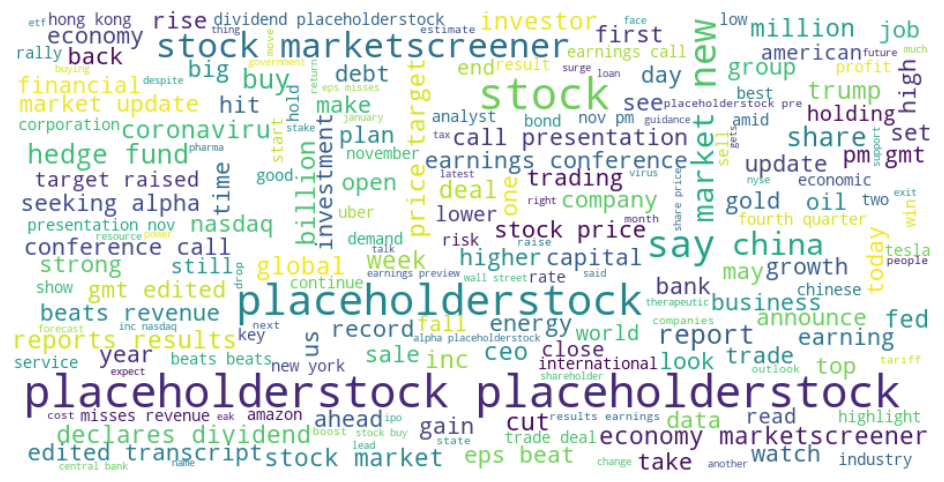

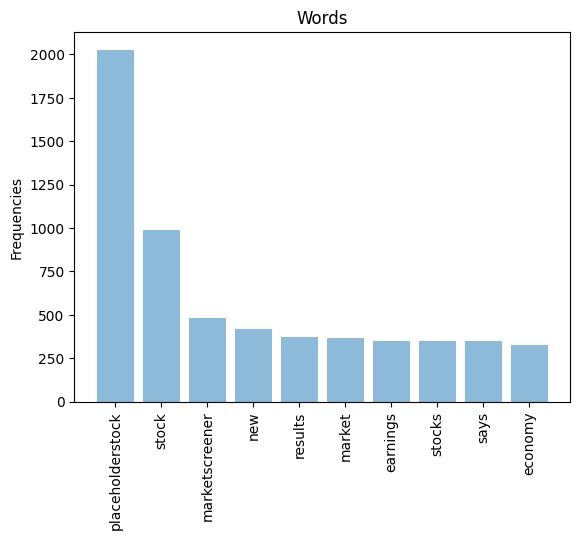

In [17]:
plot_word_cloud(train_data['clean_text'])
plot_word_bar(train_data['clean_text'])

As seen through our new plot, we already have some meaningful words like "gain" and "cut" in our word cloud, and words like "results" and "earnings" that usually to the more the important words for the context we are working in.

### Lemmatization

To clear possibly having many variations of the same word, that would all carry the same meaning we are going to lemmatize so that we get the lemma and therefore we reduce the inputs on our models while mantaining it's integrity.

In [18]:
def count_total_words(data):
    return data \
        .apply(lambda txt: txt.split()) \
        .apply(lambda words: len(words)) \
        .sum()

def count_unique_words(data):
    return len(set(' '.join(data).split()))


In [19]:
print(f"Total words: {count_total_words(train_data['clean_text'])}")
print(f"Unique words: {count_unique_words(train_data['clean_text'])}")

Total words: 77525
Unique words: 13962


In [20]:
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('omw-1.4')
lemma = WordNetLemmatizer()

lemma_test_phrase = train_data['clean_text'].iloc[14]
print(f"Before Lemmatization: {lemma_test_phrase}")

lemma_test_phrase_result = ' '.join([lemma.lemmatize(w) for w in lemma_test_phrase.split()])
print(f"After Lemmatization: {lemma_test_phrase_result}")

Before Lemmatization: placeholderstock muddy waters goes short luckin coffee


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rluis\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


After Lemmatization: placeholderstock muddy water go short luckin coffee


In [21]:
train_data['clean_text'] = train_data['clean_text'] \
    .apply(lambda txt: [lemma.lemmatize(word) for word in txt.split()]) \
    .apply(lambda words: ' '.join(words))

train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,placeholderstock jpmorgan reel expectation beyond meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,placeholderstock placeholderstock nomura point booking weakness carnival royal caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,placeholderstock cemex cut credit suisse morgan weak building outlook
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,placeholderstock btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,placeholderstock funko slide piper jaffray pt cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,week gainer loser stoxx europe dec economy marketscreener
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,tupperware ands among consumer gainer unilever lead loser
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vtv therapeutic lead healthcare gainer myomo biohaven pharmaceutical among loser
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,work xpo pyx amkr among hour mover


In [22]:
print(f"Total words after lemmatization: {count_total_words(train_data['clean_text'])}")
print(f"Unique words after lemmatization: {count_unique_words(train_data['clean_text'])}")

Total words after lemmatization: 77525
Unique words after lemmatization: 12756


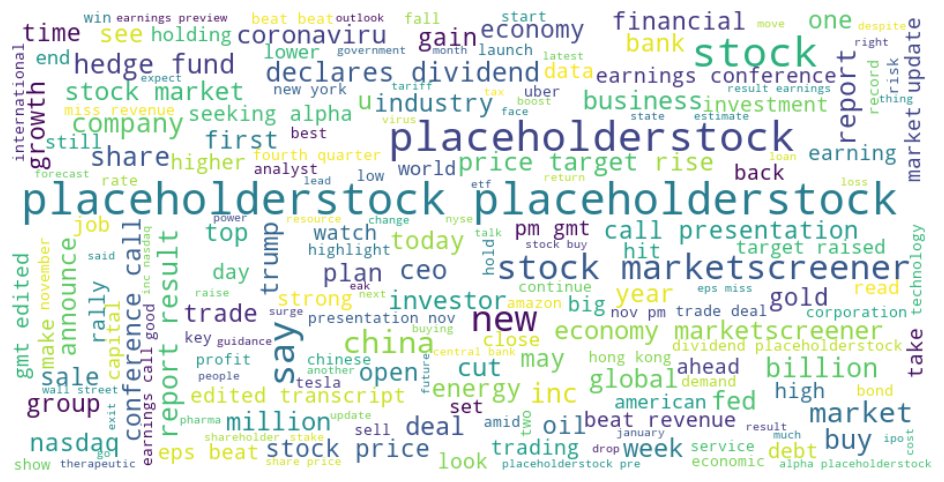

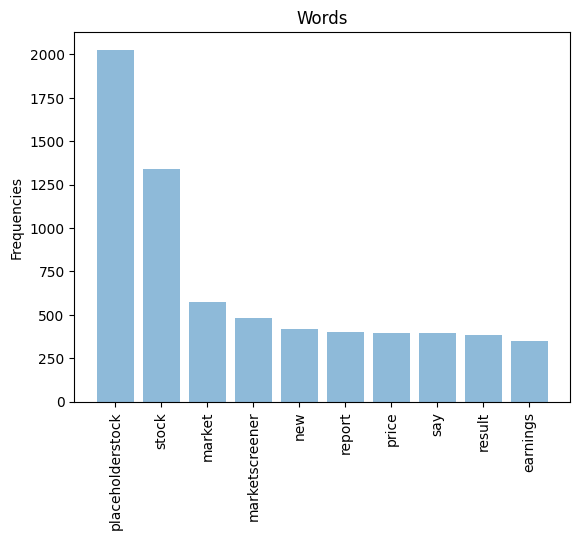

In [23]:
plot_word_cloud(train_data['clean_text'])
plot_word_bar(train_data['clean_text'])

After lemmatization we can see that we already gaining shape on getting meaningful words with high frequency, although this is still not good enough for this project.

### Stemming

So now we're going to start stemming which is the process that removes suffixes and prefixes so that we'll only get the stem of the word, with this process we are once again reducing the number of words without losing their meaning, only concentrating the word variety in a single word.

In [24]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

stemmer_test_phrase = train_data['clean_text'].iloc[1324]
print(f"Before: {stemmer_test_phrase}")

stemmer_test_phrase_result = ' '.join([stemmer.stem(w) for w in stemmer_test_phrase.split()])
print(f"After: {stemmer_test_phrase_result}")

Before: bombardier global aircraft receives prestigious ontario professional engineer award globenewswire
After: bombardi global aircraft receiv prestigi ontario profession engin award globenewswir


In [25]:
count_unique_words(train_data['clean_text'])

12756

In [26]:
train_data['clean_text'] = train_data['clean_text'] \
    .apply(lambda txt: [stemmer.stem(word) for word in txt.split()]) \
    .apply(lambda words: ' '.join(words))

train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,placeholderstock jpmorgan reel expect beyond meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,placeholderstock placeholderstock nomura point book weak carniv royal caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,placeholderstock cemex cut credit suiss morgan weak build outlook
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,placeholderstock btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,placeholderstock funko slide piper jaffray pt cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,week gainer loser stoxx europ dec economi marketscreen
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,tupperwar and among consum gainer unilev lead loser
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vtv therapeut lead healthcar gainer myomo biohaven pharmaceut among loser
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,work xpo pyx amkr among hour mover


In [27]:
count_unique_words(train_data['clean_text'])

10774

As seen after the stemming we have less words, the stemming allowed us to drop over 15% of the words that we had before this process, without risking our data integrity. After this Data Preprocessing steps we have a much more concise corpus which will allow us to achieve better results, without putting the integrity of our data at risk.

Before we move on to splitting the corpus, we'll check for empty strings which might throw some of the feature engineering methods off.

In [28]:
train_data[ train_data['clean_text'].str.len() == 0 ]

,text,label,word_count,clean_text
3943,:),2,1,
4440,F5,2,1,
4681,https://t.co/575AH1YRkF,2,1,
4682,https://t.co/9eZPvQhfMq,2,1,
4683,https://t.co/oJxNPEUpWq,2,1,
6681,S&P 500 and Down down 0.1%,0,6,


To remove this instances we simply assign to the opposite:

In [29]:
train_data = train_data[ train_data['clean_text'].str.len() != 0 ]
train_data

,text,label,word_count,clean_text
0,$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT,0,10,placeholderstock jpmorgan reel expect beyond meat
1,$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3,0,14,placeholderstock placeholderstock nomura point book weak carniv royal caribbean
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb",0,14,placeholderstock cemex cut credit suiss morgan weak build outlook
3,$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N,0,7,placeholderstock btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB,0,10,placeholderstock funko slide piper jaffray pt cut
...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Europe 50 --Dec. 2-6 #economy #MarketScreener https://t.co/iK5MO4NhQq https://t.co/AJh5V5fWTT,2,16,week gainer loser stoxx europ dec economi marketscreen
9539,Tupperware Brands among consumer gainers; Unilever leads the losers,2,9,tupperwar and among consum gainer unilev lead loser
9540,vTv Therapeutics leads healthcare gainers; Myomo and Biohaven Pharmaceutical among losers,2,11,vtv therapeut lead healthcar gainer myomo biohaven pharmaceut among loser
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,work xpo pyx amkr among hour mover


## Corpus Split

Here we are going to make a general split on the dataset so that we have our training data and testing data. Our split will be of 80% for training data and the rest for testing.

In [30]:
final_train_data = train_data[["clean_text","label"]]

X = final_train_data["clean_text"]
y = final_train_data["label"]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7629,), (1908,), (7629,), (1908,))

In [33]:
y_train = np.array(y_train)
y_test = np.array(y_test)

## Feature Engineering

In this step we will expiremnt using some diferent feature engineering techinques like the Bag of Words, TF-IDF and Word2Vector.

### Bag of Words

The Bag of words is a feature engineering method that counts the occurrence of words in a document, treating each word as a separate feature and disregarding grammar and order. In practice, it creates a boolean flag column for each word, indicating if it's present in sentence.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(binary=True)
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [35]:
X_train_bow

<7629x9570 sparse matrix of type '<class 'numpy.int64'>'
	with 60320 stored elements in Compressed Sparse Row format>

### TF-IDF

The TF-IDF is a text representation method that emphasizes the importance of words in a document based on their frequency in that document and rarity across the entire dataset.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

ngram_tfidf = TfidfVectorizer(max_df=0.8, ngram_range=(1, 3))
X_train_ngram = ngram_tfidf.fit_transform(X_train)
X_test_ngram = ngram_tfidf.transform(X_test)

### Word2Vec

Word2Vec is a word embedding method that represents words as vectors in a way that captures their semantic relationships based on context.

In [37]:
!pip install gensim

import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))
w2v = gensim.downloader.load('word2vec-google-news-300')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [38]:
!pip install tqdm

from tqdm import tqdm

def get_w2v(corpus):
    doc_vec = []
    for document in tqdm(corpus):
        words = document.split()
        valid_words = [word for word in words if word in w2v.index_to_key]
        
        if valid_words:
            word_vectors = w2v[valid_words]
            avg_vector = np.mean(word_vectors, axis=0)
        else:
            avg_vector = np.zeros_like(w2v.vectors[0])

        doc_vec.append(avg_vector)
    
    return doc_vec

In [39]:
X_test_vec = get_w2v(X_test)
len(X_test_vec)

X_train_vec = get_w2v(X_train)
len(X_train_vec)

  0%|          | 0/1908 [00:00<?, ?it/s]

100%|██████████| 7629/7629 [14:37<00:00,  8.70it/s]


7629

## Classification Models

In this chapter we are going to use classification models and compare them, we are going to put them through the different feature engineering techniques we used before so that we can see what combination obtains the best results

We can start by defining some useful functions to show us our results:

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def show_result_models(y_pred):
    labels = {"Bearish": 0, "Bullish": 1, "Neutral": 2}
    class_names = labels.keys()
    print(classification_report(y_pred, y_test, target_names = class_names))

    #Plot confusion matrix
    confusionmatrix = confusion_matrix(y_pred, y_test)

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    plt.show()


### KNN Classifier

The K-Nearest Neighbors (KNN) classifies data points by the majority class of their k nearest neighbors in the feature space. It's intuitive but sensitive to outliers, struggles with high-dimensional data, and can be computationally demanding for large datasets.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

modelknn_bow = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn_tfidf = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')
modelknn_w2v = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

modelknn_bow.fit(X_train_bow,y_train)
modelknn_tfidf.fit(X_train_ngram,y_train)
modelknn_w2v.fit(X_train_vec,y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

#### KNN using Bag of Words

              precision    recall  f1-score   support

     Bearish       0.37      0.74      0.49       153
     Bullish       0.52      0.60      0.56       321
     Neutral       0.92      0.79      0.85      1434

    accuracy                           0.75      1908
   macro avg       0.60      0.71      0.63      1908
weighted avg       0.81      0.75      0.77      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


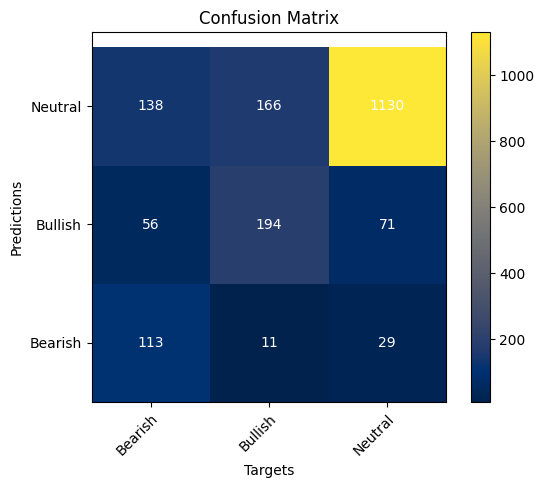

In [42]:
y_knn_pred_bow = modelknn_bow.predict(X_test_bow)
show_result_models(y_knn_pred_bow)

#### KNN using TF-IDF

              precision    recall  f1-score   support

     Bearish       0.31      0.72      0.44       133
     Bullish       0.51      0.63      0.56       302
     Neutral       0.93      0.78      0.85      1473

    accuracy                           0.75      1908
   macro avg       0.59      0.71      0.62      1908
weighted avg       0.82      0.75      0.77      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


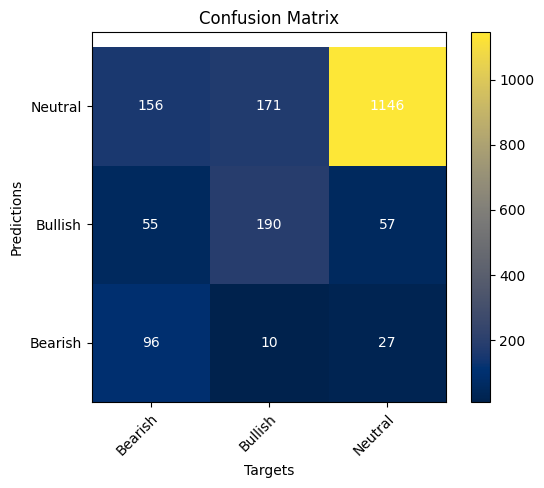

In [43]:
y_knn_pred_tfidf = modelknn_tfidf.predict(X_test_ngram)
show_result_models(y_knn_pred_tfidf)

#### KNN using Word to Vector

              precision    recall  f1-score   support

     Bearish       0.38      0.67      0.48       174
     Bullish       0.54      0.57      0.56       354
     Neutral       0.90      0.80      0.85      1380

    accuracy                           0.75      1908
   macro avg       0.61      0.68      0.63      1908
weighted avg       0.79      0.75      0.76      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


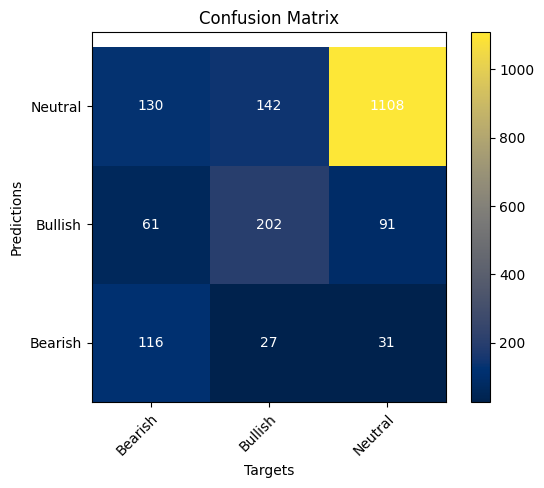

In [44]:
y_knn_pred_w2v = modelknn_w2v.predict(X_test_vec)
show_result_models(y_knn_pred_w2v)

### Logistic Regression

Logistic Regression models the probability of an instance belonging to a class based on linear relationships with input features. It's efficient and interpretable but assumes linearity, which may limit its performance in complex scenarios.

In [45]:
from sklearn.linear_model import LogisticRegression
model_lr_bow = LogisticRegression(max_iter=1000)
model_lr_tfidf = LogisticRegression(max_iter=1000)
model_lr_w2v = LogisticRegression(max_iter=1000)

model_lr_bow.fit(X_train_bow,y_train)
model_lr_tfidf.fit(X_train_ngram,y_train)
model_lr_w2v.fit(X_train_vec,y_train)

LogisticRegression(max_iter=1000)

#### Logistic Regression using BoW

              precision    recall  f1-score   support

     Bearish       0.46      0.75      0.57       190
     Bullish       0.63      0.72      0.67       325
     Neutral       0.93      0.82      0.87      1393

    accuracy                           0.80      1908
   macro avg       0.67      0.76      0.70      1908
weighted avg       0.83      0.80      0.81      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


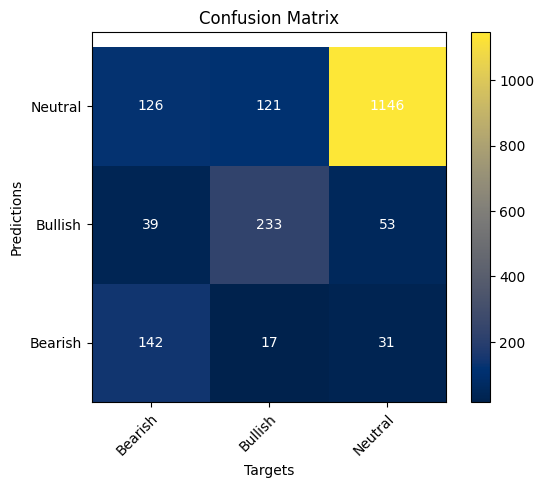

In [46]:
y_lr_pred_bow = model_lr_bow.predict(X_test_bow)
show_result_models(y_lr_pred_bow)

#### Logistic Regression using TF-IDF

              precision    recall  f1-score   support

     Bearish       0.28      0.85      0.42       100
     Bullish       0.60      0.73      0.66       302
     Neutral       0.96      0.79      0.86      1506

    accuracy                           0.78      1908
   macro avg       0.61      0.79      0.65      1908
weighted avg       0.87      0.78      0.81      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


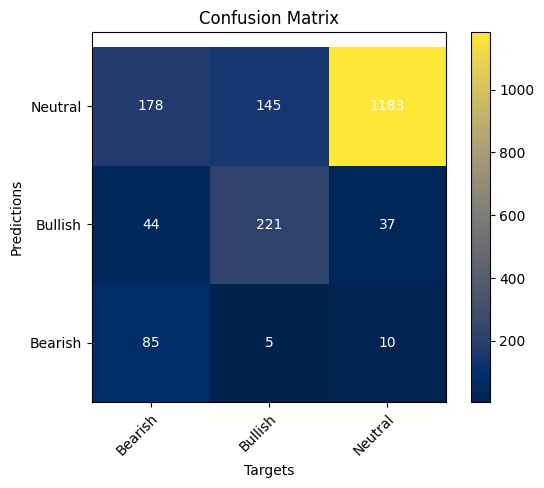

In [47]:
y_lr_pred_tfidf = model_lr_tfidf.predict(X_test_ngram)
show_result_models(y_lr_pred_tfidf)

#### Logistic Regression using Word to Vector

              precision    recall  f1-score   support

     Bearish       0.30      0.61      0.40       150
     Bullish       0.49      0.61      0.54       295
     Neutral       0.92      0.77      0.84      1463

    accuracy                           0.73      1908
   macro avg       0.57      0.66      0.59      1908
weighted avg       0.80      0.73      0.76      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


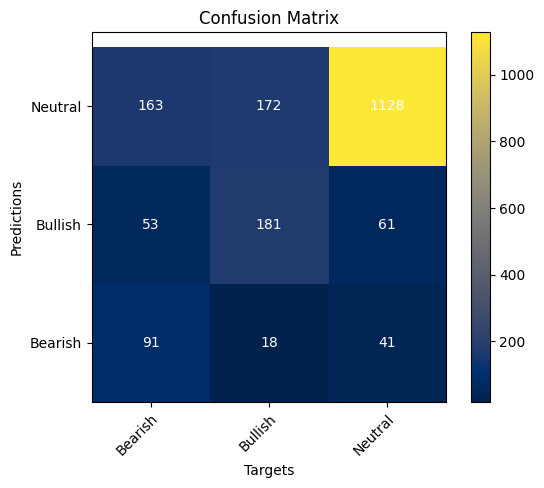

In [48]:
y_lr_pred_w2v = model_lr_w2v.predict(X_test_vec)
show_result_models(y_lr_pred_w2v)

### MLP - Multilayer Perceptron

Multilayer Perceptron (MLP) is a neural network with multiple layers for capturing complex patterns. It's versatile but can be computationally intensive, sensitive to initialization, and less interpretable than simpler models.

In [49]:
from sklearn.neural_network import MLPClassifier

modelmlp_bow = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1, max_iter=1000)
modelmlp_tfidf = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1, max_iter=1000)
modelmlp_w2v = MLPClassifier(solver='adam', hidden_layer_sizes=(2,2), activation='logistic', random_state=1, max_iter=1000)

modelmlp_bow.fit(X_train_bow,y_train)
modelmlp_tfidf.fit(X_train_ngram,y_train)
modelmlp_w2v.fit(X_train_vec,y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2, 2), max_iter=1000,
              random_state=1)

#### MLP using BoW

              precision    recall  f1-score   support

     Bearish       0.53      0.49      0.51       332
     Bullish       0.65      0.59      0.62       412
     Neutral       0.80      0.84      0.82      1164

    accuracy                           0.73      1908
   macro avg       0.66      0.64      0.65      1908
weighted avg       0.72      0.73      0.72      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


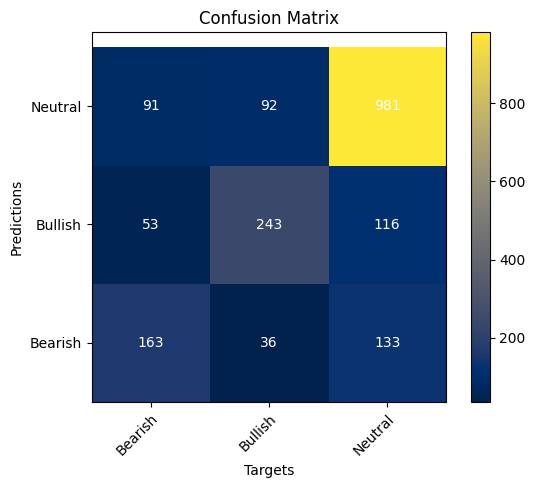

In [50]:
y_mlp_pred_bow = modelmlp_bow.predict(X_test_bow)
show_result_models(y_mlp_pred_bow)

#### MLP using TF-IDF

              precision    recall  f1-score   support

     Bearish       0.59      0.53      0.56       342
     Bullish       0.66      0.71      0.68       345
     Neutral       0.87      0.88      0.87      1221

    accuracy                           0.78      1908
   macro avg       0.71      0.71      0.71      1908
weighted avg       0.78      0.78      0.78      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


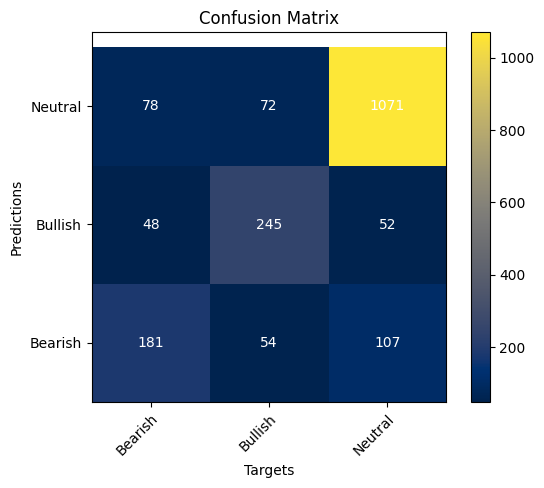

In [51]:
y_mlp_pred_tfidf = modelmlp_tfidf.predict(X_test_ngram)
show_result_models(y_mlp_pred_tfidf)

#### MLP using Word to Vector

              precision    recall  f1-score   support

     Bearish       0.38      0.53      0.45       223
     Bullish       0.56      0.59      0.57       354
     Neutral       0.87      0.80      0.83      1331

    accuracy                           0.73      1908
   macro avg       0.60      0.64      0.62      1908
weighted avg       0.75      0.73      0.74      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


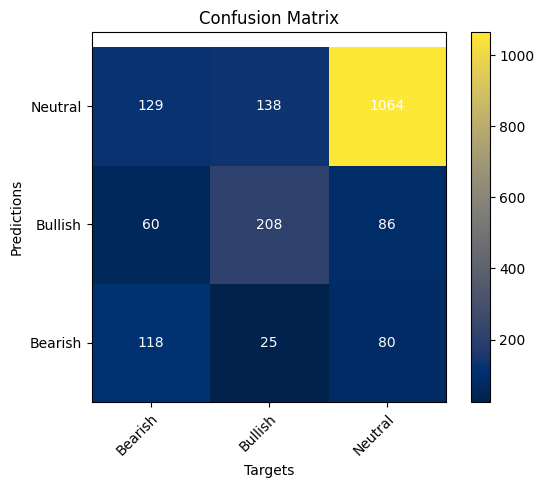

In [52]:
y_mlp_pred_w2v = modelmlp_w2v.predict(X_test_vec)
show_result_models(y_mlp_pred_w2v)

### Naive Bayes

Naive Bayes is a probabilistic classification algorithm that assumes feature independence given the class. It's simple, computationally efficient, and interpretable, but may struggle with complex relationships and the independence assumption.

In [53]:
from sklearn.naive_bayes import GaussianNB

modelnb_bow = GaussianNB()
modelnb_tfidf = GaussianNB()
modelnb_w2v = GaussianNB()

modelnb_bow.fit(X_train_bow.toarray(),y_train)
modelnb_tfidf.fit(X_train_ngram.toarray(),y_train)
modelnb_w2v.fit(X_train_vec,y_train)

GaussianNB()

#### Naive Bayes using BoW

              precision    recall  f1-score   support

     Bearish       0.55      0.29      0.38       587
     Bullish       0.35      0.42      0.38       307
     Neutral       0.66      0.79      0.72      1014

    accuracy                           0.58      1908
   macro avg       0.52      0.50      0.49      1908
weighted avg       0.57      0.58      0.56      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


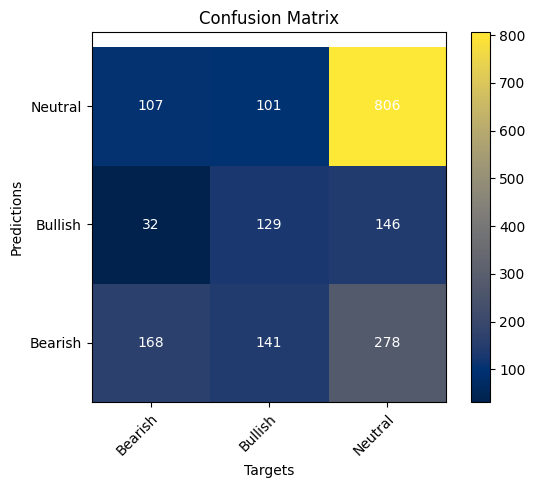

In [54]:
y_nb_pred_bow = modelnb_bow.predict(X_test_bow.toarray())
show_result_models(y_nb_pred_bow)

#### Naive Bayes using TF-IDF

              precision    recall  f1-score   support

     Bearish       0.51      0.45      0.48       345
     Bullish       0.56      0.58      0.57       353
     Neutral       0.80      0.81      0.80      1210

    accuracy                           0.70      1908
   macro avg       0.62      0.62      0.62      1908
weighted avg       0.70      0.70      0.70      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


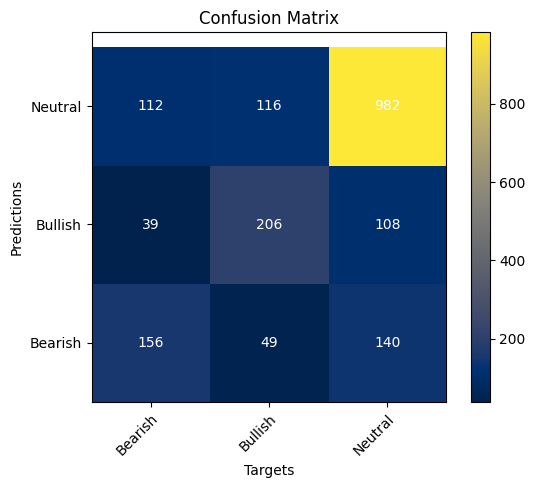

In [55]:
y_nb_pred_tfidf = modelnb_tfidf.predict(X_test_ngram.toarray())
show_result_models(y_nb_pred_tfidf)

Naive Bayes using Word to Vector

              precision    recall  f1-score   support

     Bearish       0.46      0.43      0.44       325
     Bullish       0.65      0.43      0.51       565
     Neutral       0.68      0.83      0.75      1018

    accuracy                           0.64      1908
   macro avg       0.60      0.56      0.57      1908
weighted avg       0.64      0.64      0.63      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


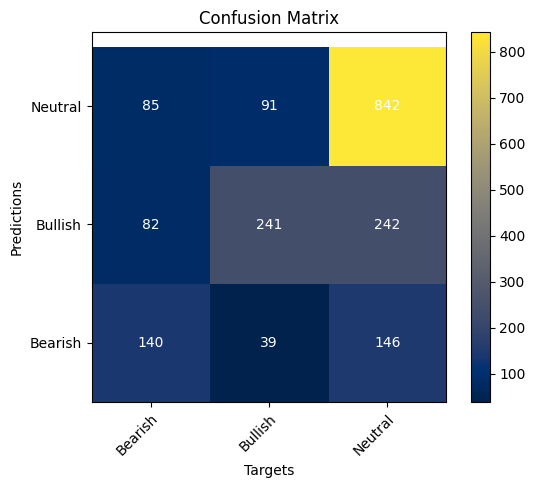

In [56]:
y_nb_pred_w2v = modelnb_w2v.predict(X_test_vec)
show_result_models(y_nb_pred_w2v)

### Random Forest

We chose to also implement the Random Forest algorithm as tweets often exhibit complex and non-linear patterns, making it challenging for simpler models to capture the nuances of language and sentiment. Random Forests, with their ensemble of decision trees, excel at handling such intricacies and can effectively model the diverse features present in tweet data. The algorithm's ability to identify important features aids in extracting relevant information from the text, helping to discern sentiments, topics, or trends that contribute to the classification task. All this combined should make the Random Forest a suitable choice to achieve the accurate results we are looking for.

In [57]:
from sklearn.ensemble import RandomForestClassifier

modelrfc_bow = RandomForestClassifier()
modelrfc_tfidf = RandomForestClassifier()
modelrfc_w2v = RandomForestClassifier()

modelrfc_bow.fit(X_train_bow,y_train)
modelrfc_tfidf.fit(X_train_ngram,y_train)
modelrfc_w2v.fit(X_train_vec,y_train)

RandomForestClassifier()

#### Random Forest using BoW

              precision    recall  f1-score   support

     Bearish       0.36      0.80      0.49       137
     Bullish       0.64      0.70      0.66       339
     Neutral       0.94      0.81      0.87      1432

    accuracy                           0.79      1908
   macro avg       0.64      0.77      0.67      1908
weighted avg       0.84      0.79      0.80      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


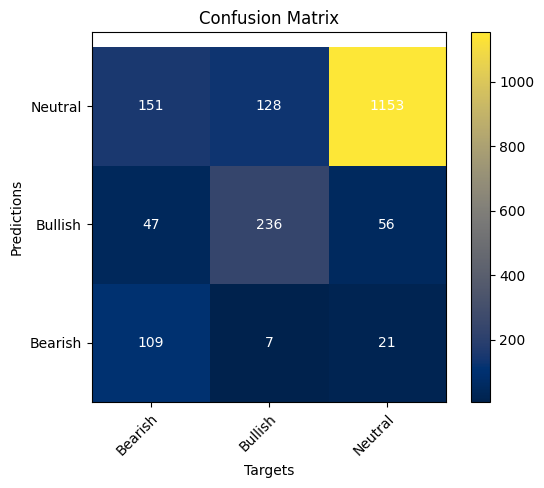

In [58]:
y_rfc_pred_bow = modelrfc_bow.predict(X_test_bow)
show_result_models(y_rfc_pred_bow)

#### Random Forest using TF-IDF

              precision    recall  f1-score   support

     Bearish       0.31      0.82      0.45       114
     Bullish       0.60      0.69      0.64       318
     Neutral       0.95      0.79      0.86      1476

    accuracy                           0.78      1908
   macro avg       0.62      0.77      0.65      1908
weighted avg       0.85      0.78      0.80      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


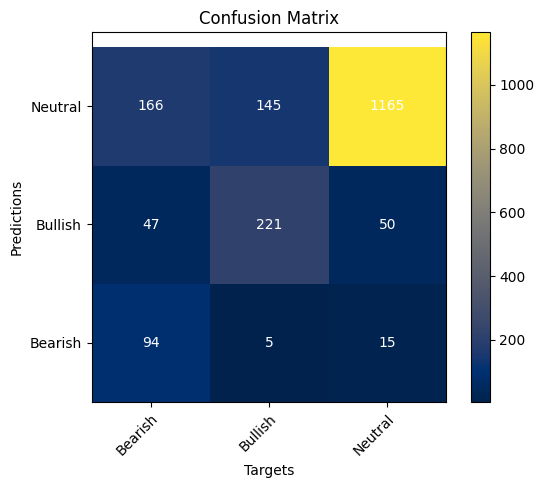

In [59]:
y_rfc_pred_tfidf = modelrfc_tfidf.predict(X_test_ngram)
show_result_models(y_rfc_pred_tfidf)

#### Random Forest using Word to Vector

              precision    recall  f1-score   support

     Bearish       0.15      0.84      0.26        56
     Bullish       0.31      0.68      0.43       168
     Neutral       0.98      0.71      0.83      1684

    accuracy                           0.72      1908
   macro avg       0.48      0.75      0.50      1908
weighted avg       0.90      0.72      0.77      1908



C:\Users\rluis\AppData\Local\Temp\ipykernel_23476\1971761661.py:37: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


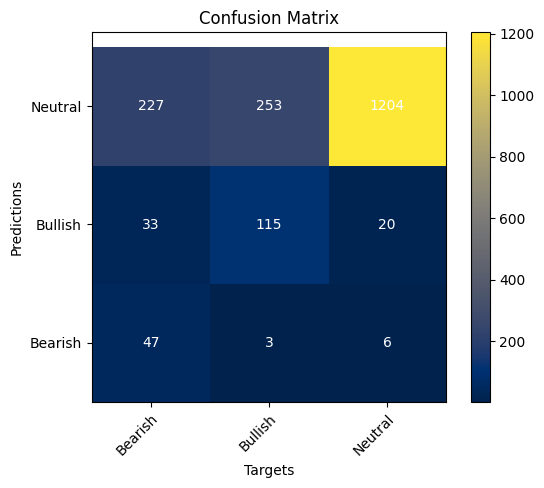

In [60]:
y_rfc_pred_w2v = modelrfc_w2v.predict(X_test_vec)
show_result_models(y_rfc_pred_w2v)

## Evaluation

When comparing the performance of all models we can see that on average the Naive Bayes model obtained the lowest results on average this is possibly due to its assumption of feature independence, and the model's struggles with out-of-vocabulary words commonly used in tweets.

Next we have the MLP in our second to last spot, this derives from the fact that the MLP may struggle with its limited interpretability and difficulty on capturing intricate patterns in tweets.

In the middle of the pack we have the KNN who faces some challenges with potential bias toward majority classes, and computational complexity, especially with large datasets. However, KNN's simplicity and ability to capture local patterns in the data could be beneficial for tweet classification, particularly in scenarios with well-defined clusters or when local relationships are essential.

In second place we have the RF, it excels in tweet classification due to its ability to handle high-dimensional and diverse features, providing robustness against overfitting and capturing complex relationships in data. However, its lack of transparency and interpretability, along with potential issues in handling extremely imbalanced datasets, could pose challenges.

In our top spot we have the LR, which is well-suited for tweet classification tasks due to its simplicity, interpretability, and efficiency, making it computationally lightweight for large datasets. It excels in scenarios where the relationships between features and the target variable are relatively linear. However, logistic regression may struggle with highly non-linear relationships and complex patterns found in tweets.

|        | KNN  | LR   | MLP  | NB   | RF   |
|:------:|------|------|------|------|------|
|   BoW  | 0.79 | 0.81 | 0.72 | 0.55 | 0.80 |
| TF-IDF | 0.79 | 0.81 | 0.76 | 0.71 | 0.80 |
|   W2V  | 0.77 | 0.77 | 0.76 | 0.61 | 0.78 |

As seen in the table of weighted averages of F1 scores, models using TF-IDF performed better than its counterparts, because TF-IDF considers the importance of words not just based on their frequency but also by taking into account their rarity across the entire dataset.   

Unlike Bag of Words, TF-IDF captures the essence of term importance, making it more suitable for tasks where certain words carry significant meaning.

Additionally, compared to Word2Vec, TF-IDF does not rely on the context of neighboring words, which is beneficial for tweets with limited context.

## Predictions on test set

Having figured out our best model, we'll now use it with the test set ("test.csv") to output this project's prediction. We'll also use the same data cleaning and pre-processing tecniques.

In [61]:
test_data = pd.read_csv('test.csv')
test_data

,id,text
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts"
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM)
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX"
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9"
...,...,...
2383,2383,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.… https://t.co/Okr6M5SxnF
2384,2384,"Domtar EPS misses by $0.05, revenue in-line"
2385,2385,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo
2386,2386,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with… https://t.co/s6fdABDVVW


Just like before, we'll now remove URLs from the sentences:

In [62]:
test_data['clean_text'] = test_data['text'].apply(remove_url)
test_data

,id,text,clean_text
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts","ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts"
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM)
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX","China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro…"
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9","Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's…"
...,...,...,...
2383,2383,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.… https://t.co/Okr6M5SxnF,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.…
2384,2384,"Domtar EPS misses by $0.05, revenue in-line","Domtar EPS misses by $0.05, revenue in-line"
2385,2385,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo
2386,2386,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with… https://t.co/s6fdABDVVW,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with…


We'll also generify stock tickers to #PLACEHOLDERSTOCK:

In [63]:
test_data['clean_text'] = test_data['clean_text'] \
    .apply(generify_stock)

After this, we'll remove stop words, as well as single characters that do not contribute to our model:

In [64]:
test_data['clean_text'] = test_data['clean_text'].apply(remove_useless_words)
test_data

,id,text,clean_text
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",etf assets surge tenfold years trillion bank america predicts
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),hedge funds think evolution petroleum corporation epm
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,placeholderstock phillips van heusen earnings preview
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",china process waiving retaliatory tariffs imports pork soy domestic companies pro
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",highlight growth scarce investors seem willing pay growth stock pncbank
...,...,...,...
2383,2383,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.… https://t.co/Okr6M5SxnF,placeholderstock invacare corporation ivc ceo matthew monaghan results earnings call transcript
2384,2384,"Domtar EPS misses by $0.05, revenue in-line",domtar eps misses revenue line
2385,2385,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo,india plans incentives ing foreign manufacturers tesla glaxo
2386,2386,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with… https://t.co/s6fdABDVVW,placeholderstock shows institutional accumulation blue skyscraper last week closing near highs forms cup base


We'll also apply lemmatization:

In [65]:
test_data['clean_text'] = test_data['clean_text'] \
    .apply(lambda txt: [lemma.lemmatize(word) for word in txt.split()]) \
    .apply(lambda words: ' '.join(words))

And stemming:

In [66]:
test_data['clean_text'] = test_data['clean_text'] \
    .apply(lambda txt: [stemmer.stem(word) for word in txt.split()]) \
    .apply(lambda words: ' '.join(words))

test_data

,id,text,clean_text
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",etf asset surg tenfold year trillion bank america predict
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),hedg fund think evolut petroleum corpor epm
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,placeholderstock phillip van heusen earn preview
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",china process waiv retaliatori tariff import pork soy domest compani pro
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",highlight growth scarc investor seem will pay growth stock pncbank
...,...,...,...
2383,2383,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.… https://t.co/Okr6M5SxnF,placeholderstock invacar corpor ivc ceo matthew monaghan result earn call transcript
2384,2384,"Domtar EPS misses by $0.05, revenue in-line",domtar ep miss revenu line
2385,2385,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo,india plan incent ing foreign manufactur tesla glaxo
2386,2386,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with… https://t.co/s6fdABDVVW,placeholderstock show institut accumul blue skyscrap last week close near high form cup base


Finally we can now make predictions using our best model, Logistic Regression using TF-IDF, to do this we also need to apply the TF-IDF Vectorizer so that this feature engineering method can be correctly applied:

In [67]:
test_data["label"] = test_data['clean_text'] \
    .apply(lambda s: ngram_tfidf.transform([s])) \
    .apply(lambda t: model_lr_tfidf.predict(t)[0])
test_data

,id,text,clean_text,label
0,0,"ETF assets to surge tenfold in 10 years to $50 trillion, Bank of America predicts",etf asset surg tenfold year trillion bank america predict,2
1,1,Here’s What Hedge Funds Think Evolution Petroleum Corporation (EPM),hedg fund think evolut petroleum corpor epm,2
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Preview https://t.co/kNhCYwVnBX,placeholderstock phillip van heusen earn preview,2
3,3,"China is in the process of waiving retaliatory tariffs on imports of U.S. pork and soy by domestic companies, a pro… https://t.co/08mZU9TrBX",china process waiv retaliatori tariff import pork soy domest compani pro,2
4,4,"Highlight: “When growth is scarce, investors seem very willing to pay up for growth stock"" @PNCBank's… https://t.co/rO4fBOkBG9",highlight growth scarc investor seem will pay growth stock pncbank,2
...,...,...,...,...
2383,2383,$IVC - Invacare Corporation (IVC) CEO Matthew Monaghan on Q4 2019 Results - Earnings Call Transcript.… https://t.co/Okr6M5SxnF,placeholderstock invacar corpor ivc ceo matthew monaghan result earn call transcript,2
2384,2384,"Domtar EPS misses by $0.05, revenue in-line",domtar ep miss revenu line,0
2385,2385,India Plans Incentives to Bring In Foreign Manufacturers From Tesla to Glaxo,india plan incent ing foreign manufactur tesla glaxo,2
2386,2386,$NVCR shows institutional accumulation with blue skyscraper last week and closing near highs. Forms a cup base with… https://t.co/s6fdABDVVW,placeholderstock show institut accumul blue skyscrap last week close near high form cup base,1


And we output it to a CSV as per the specifications:

In [68]:
test_data[['id', 'label']].to_csv("Predictions_01.csv", index=False)